### Detection of PD based on Voice features 

This dataset was obtaines from here: 
https://archive-beta.ics.uci.edu/ml/datasets/parkinsons


Data: The dataset contains voice measurements obtained from patients with PD and healthy controls in remote settings. The voice sample analyzed is a sustain vowel test. 
<div style="text-align:center">
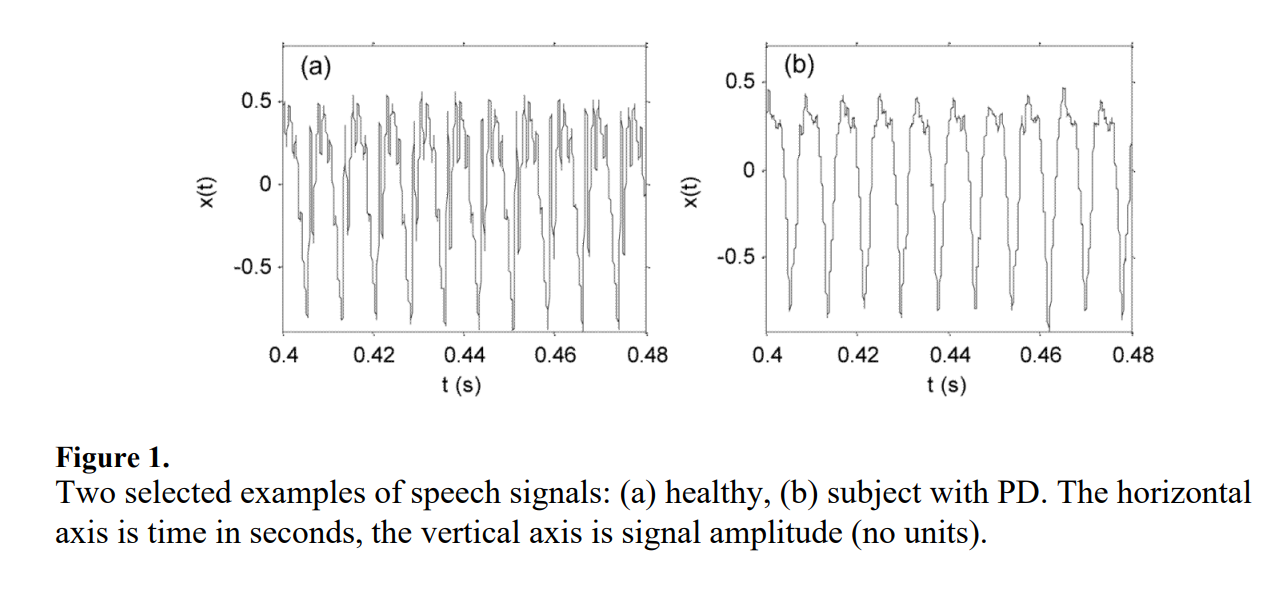
</div>


This is their population demographics:
<div style="text-align:center">
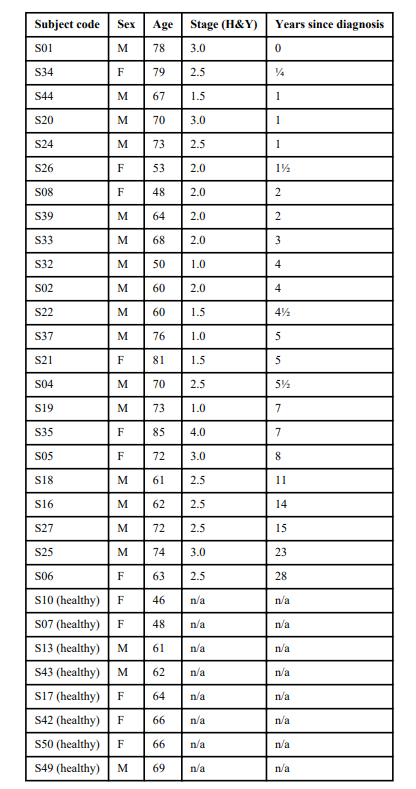
</div>

Each sample was recorded at the subject's home. The researchers then extracted several features from the sample, including:

- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

Most of these measures where obtain with a software called Praat (https://www.fon.hum.uva.nl/praat/), others where computer using custom algorithms. 

## Objective

The objective is to use these voice features to identify if the speaker has PD or no. However, there are multiple recordings per subject, so it is possible that your classification algorithm learns to identify subjects instead of diease status. We need to make sure that the same subject is not included in the test and train groups.



In [71]:
import pandas as pd
import random
import pprint
import numpy as np

In [10]:
data = pd.read_csv('parkinsons.data')
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


### part 1 -- Find out how many subjects there are and split the data

Note that the subject name is in the form 'phon_R01_S01_1', where **S01** refers to the subject ID and **1** refers to the recording number. Lets create a new column that includes only the subject ID

In [20]:
names = data['name'].values
ID = []
for name in names:
    ID.append(name.split('_')[-2])

data.insert(0,'ID',ID)
data

,ID,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,S01,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,S01,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,S01,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,S01,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,S50,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,S50,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,S50,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,S50,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [50]:
#now we can cound the number of subjects 
subjects_ID = list(data['ID'].unique())
number_of_subjects = len(subjects_ID)
number_train = int(0.7*number_of_subjects)
number_test = number_of_subjects - number_train

#random suffle the list and pick subjects to train an test
random.seed(15) #fix the seed so you can reproduce the results 
random.shuffle(subjects_ID)
subjects_ID_train = subjects_ID[:number_train]
subjects_ID_test = subjects_ID[number_train:]

In [51]:
data_train = data[data['ID'].isin(subjects_ID_train)]
data_test = data[~data['ID'].isin(subjects_ID_train)]

In [52]:
data_train 

,ID,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
12,S04,phon_R01_S04_1,136.926,159.866,131.276,0.00293,0.00002,0.00118,0.00153,0.00355,...,0.01968,0.00581,25.703,1,0.460600,0.646846,-6.547148,0.152813,2.041277,0.138512
13,S04,phon_R01_S04_2,139.173,179.139,76.556,0.00390,0.00003,0.00165,0.00208,0.00496,...,0.02184,0.01041,24.889,1,0.430166,0.665833,-5.660217,0.254989,2.519422,0.199889
14,S04,phon_R01_S04_3,152.845,163.305,75.836,0.00294,0.00002,0.00121,0.00149,0.00364,...,0.03191,0.00609,24.922,1,0.474791,0.654027,-6.105098,0.203653,2.125618,0.170100
15,S04,phon_R01_S04_4,142.167,217.455,83.159,0.00369,0.00003,0.00157,0.00203,0.00471,...,0.02316,0.00839,25.175,1,0.565924,0.658245,-5.340115,0.210185,2.205546,0.234589
16,S04,phon_R01_S04_5,144.188,349.259,82.764,0.00544,0.00004,0.00211,0.00292,0.00632,...,0.02908,0.01859,22.333,1,0.567380,0.644692,-5.440040,0.239764,2.264501,0.218164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,S50,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,S50,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,S50,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,S50,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [53]:
#verify that there are patients and controls in the test set !!!!
data_test 

,ID,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,S01,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,S01,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,S01,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,S01,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,S01,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,S02,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,S02,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,S02,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,S02,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [62]:
columns =list(data_train.columns)
columns

['ID',
 'name',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [63]:
#remove columns that shouldn't be in the X matrix
columns.remove('ID')
columns.remove('name')
columns.remove('status')

In [145]:
#create X and y matrix 
y_train = data_train['status'].values
X_train = data_train[columns].values

y_test = data_test['status'].values
X_test = data_test[columns].values

In [146]:
#We can find the mean and std of the matriX
pd.DataFrame(np.column_stack((columns,X.mean(axis=0),X.std(axis=0))), columns = ['Feature', 'Mean', 'Std'])

,Feature,Mean,Std
0,MDVP:Fo(Hz),153.35918518518517,33.23833136743829
1,MDVP:Fhi(Hz),196.88639999999998,84.11640470700465
2,MDVP:Flo(Hz),110.45099259259261,36.20415168611269
3,MDVP:Jitter(%),0.006163333333333333,0.004233109005429917
4,MDVP:Jitter(Abs),4.1696296296296304e-05,2.5787241770581646e-05
5,MDVP:RAP,0.0032173333333333333,0.0025223126366564945
6,MDVP:PPQ,0.003362296296296296,0.002541744790272063
7,Jitter:DDP,0.009652666666666669,0.007566350575874543
8,MDVP:Shimmer,0.030437037037037037,0.01819830513370322
9,MDVP:Shimmer(dB),0.29228888888888893,0.19366010188401844


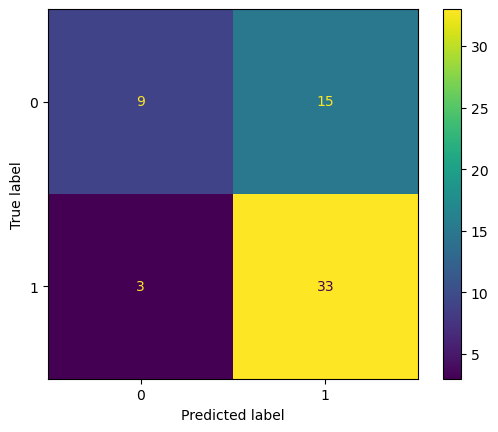

In [160]:
#we can try a linear regression model 

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, plot_confusion_matrix

import matplotlib.pyplot as plt

reg = Pipeline([('scaler', StandardScaler()),
                ('LogisticRegression', LogisticRegression())])
reg.fit(X_train,y_train);



plot_confusion_matrix(reg, X_test,y_test)
plt.show();

## Imbalanced datasets --- The NORM, not the exception in biomedical data

One problem with this dataset is that the classes are not balanced, that is, there are more samples of one class than the other, lets count them

In [112]:
total_patients = abs(np.sum(y_train==1))
total_controls = abs(np.sum(y_train==0))
print(f'Total Patients = {total_patients}, Total Controls = {total_controls}')

Total Patients = 111, Total Controls = 24


Thee are 111 samples of Patients and only 24 samples of controls. The model has a better chance of learning to identify patients than controls

To help the model, we can use ```class_weight='balanced'``` as an input to the Logistic Regression model

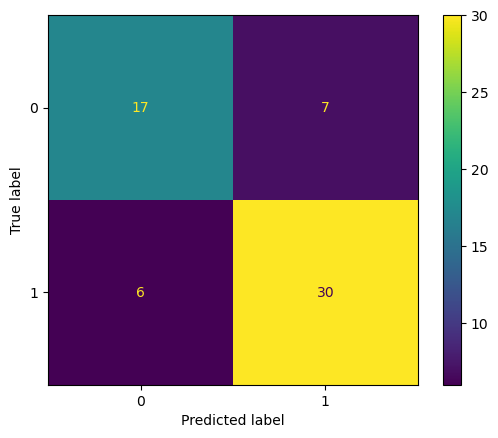

In [115]:
reg_balanced = Pipeline([('scaler', StandardScaler()),
                ('LogisticRegression', LogisticRegression(class_weight='balanced'))])
reg_balanced.fit(X_train,y_train);



plot_confusion_matrix(reg_balanced, X_test,y_test)
plt.show();

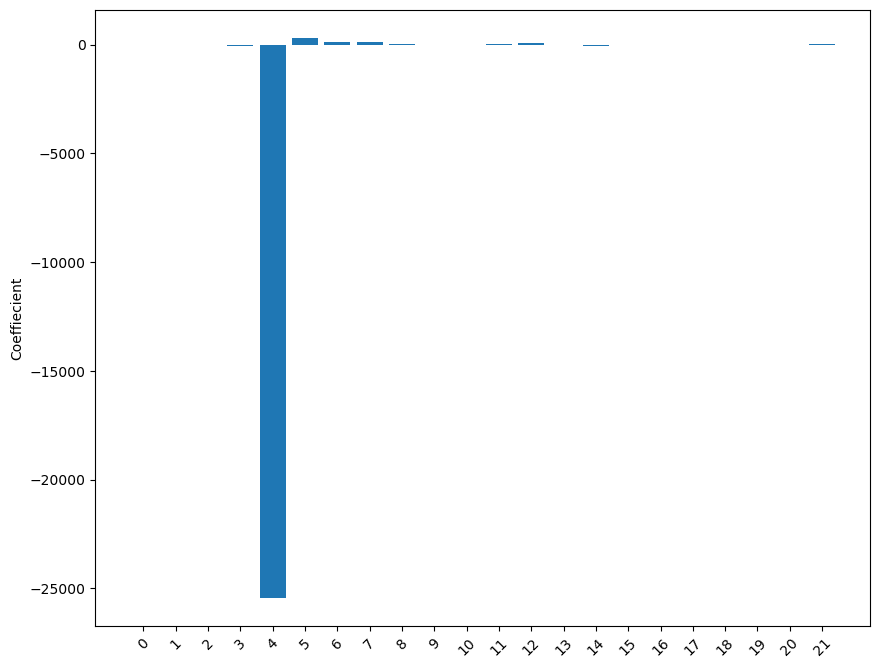

In [117]:
coefficients = np.true_divide(reg_balanced.named_steps['LogisticRegression'].coef_,  reg_balanced.named_steps['scaler'].scale_)[0]
fig,ax = plt.subplots(1,1,figsize=(10,8))
plt.bar(range(len(coefficients)),coefficients)
plt.xticks(range(len(coefficients)), columns)
plt.ylabel('Coeffiecient')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticks(), rotation = 45)
plt.show();

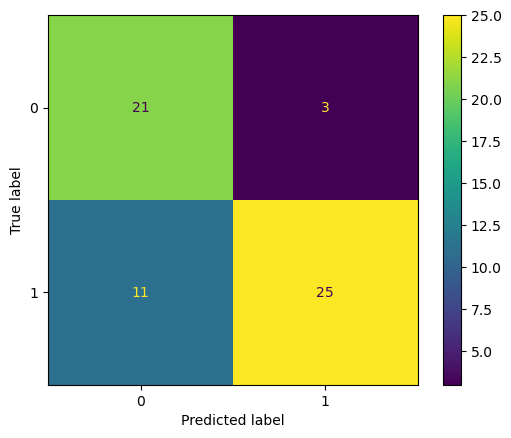

In [143]:
#lets try with only one feature
#create X and y matrix 
columns_selected = columns[4:6]
y_train_selected = data_train['status'].values
X_train_selected = data_train[columns_selected].values 

y_test_selected = data_test['status'].values
X_test_selected = data_test[columns_selected].values

reg_balanced.fit(X_train_selected,y_train_selected);

plot_confusion_matrix(reg_balanced, X_test_selected,y_test_selected)
plt.show();

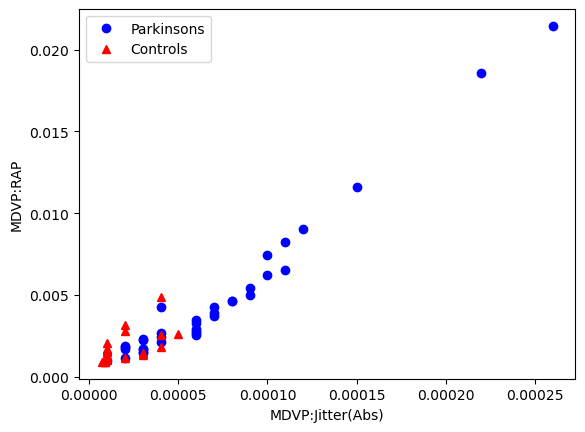

In [144]:
plt.plot(X_test_selected[y_test_selected==1,0],X_test_selected[y_test_selected==1,1],'bo', label='Parkinsons')
plt.plot(X_test_selected[y_test_selected==0,0],X_test_selected[y_test_selected==0,1],'r^', label='Controls')
plt.xlabel(columns[4])
plt.ylabel(columns[5])
plt.legend()
plt.show()

### We try a non-linear classifier -  Random Forrest

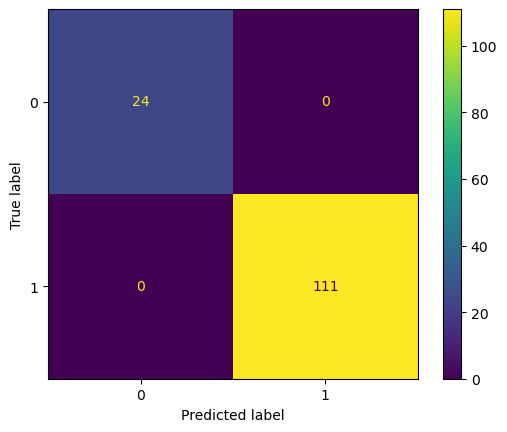

In [164]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier( n_estimators=200, class_weight='balanced', max_depth=6)
rnd_clf.fit(X_train, y_train)

plot_confusion_matrix(rnd_clf, X_train,y_train)
plt.show();

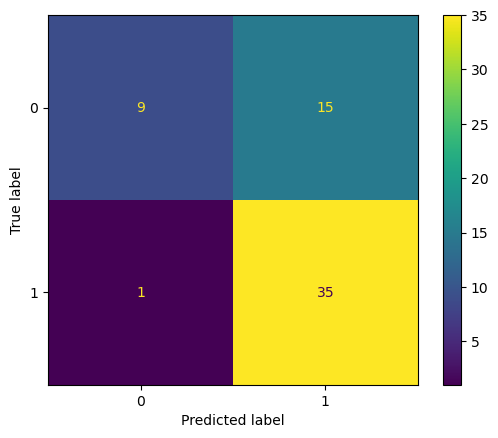

In [165]:
plot_confusion_matrix(rnd_clf, X_test,y_test)
plt.show();

In [167]:
idx = 0
for name, score in zip(columns, rnd_clf.feature_importances_):
    print(idx, name, score)
    idx+=1

0 MDVP:Fo(Hz) 0.0586761980376767
1 MDVP:Fhi(Hz) 0.05296105727062102
2 MDVP:Flo(Hz) 0.031306882169817585
3 MDVP:Jitter(%) 0.009827290379255046
4 MDVP:Jitter(Abs) 0.014639756742817698
5 MDVP:RAP 0.04199758229561226
6 MDVP:PPQ 0.046823931817966534
7 Jitter:DDP 0.0380497503001704
8 MDVP:Shimmer 0.030056007685786014
9 MDVP:Shimmer(dB) 0.035647077871792304
10 Shimmer:APQ3 0.036610042548690776
11 Shimmer:APQ5 0.0351370408390742
12 MDVP:APQ 0.05283683597413229
13 Shimmer:DDA 0.02722985140019676
14 NHR 0.052462943088857836
15 HNR 0.03670665569264521
16 RPDE 0.02977423900361438
17 DFA 0.03520475483849319
18 spread1 0.12414087084842904
19 spread2 0.04007845221160939
20 D2 0.013310513918054082
21 PPE 0.15652226506468733


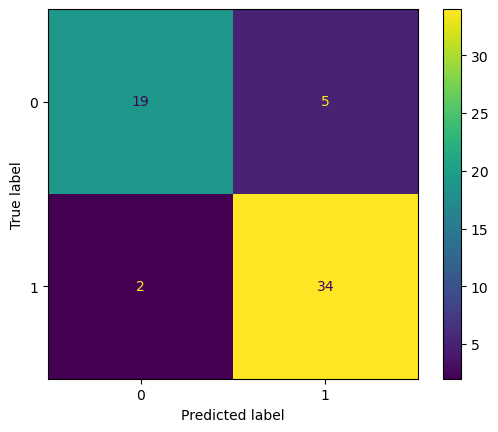

In [173]:

columns_selected = [columns[i] for i in [21,18]]
y_train_selected = data_train['status'].values
X_train_selected = data_train[columns_selected].values 

y_test_selected = data_test['status'].values
X_test_selected = data_test[columns_selected].values

rnd_clf = RandomForestClassifier( n_estimators=200, class_weight='balanced', max_depth=6)
rnd_clf.fit(X_train_selected , y_train_selected )

plot_confusion_matrix(rnd_clf, X_test_selected ,y_test_selected)
plt.show();

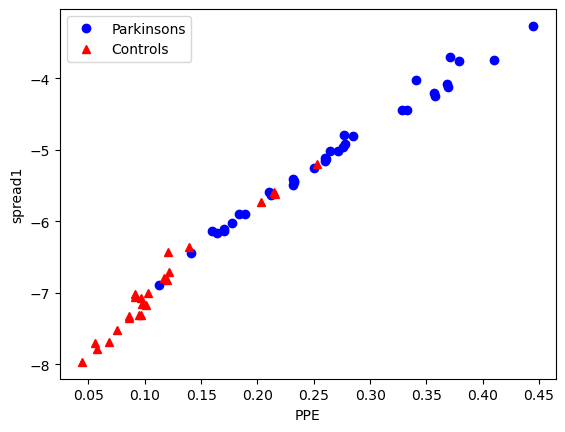

In [169]:
plt.plot(X_test_selected[y_test_selected==1,0],X_test_selected[y_test_selected==1,1],'bo', label='Parkinsons')
plt.plot(X_test_selected[y_test_selected==0,0],X_test_selected[y_test_selected==0,1],'r^', label='Controls')
plt.xlabel(columns[21])
plt.ylabel(columns[18])
plt.legend()
plt.show()

In [181]:
res_df = data_test[['ID','status']].copy()
res_df['status']= data_test['status']
res_df['pred'] = rnd_clf.predict(X_test_selected)
res_df

,ID,status,pred
0,S01,1,1
1,S01,1,1
2,S01,1,1
3,S01,1,1
4,S01,1,1
5,S01,1,1
6,S02,1,1
7,S02,1,1
8,S02,1,1
9,S02,1,1


In [183]:
res_df.groupby('ID')[['.mean()

ID
S01    1
S02    1
S07    0
S10    0
S20    1
S24    1
S32    1
S34    1
S42    0
S49    0
Name: status, dtype: int64